In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import pytesseract

In [2]:
def show_image(image, is_gray=True):
    plt.figure(figsize=(10, 10))
    if (is_gray):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()

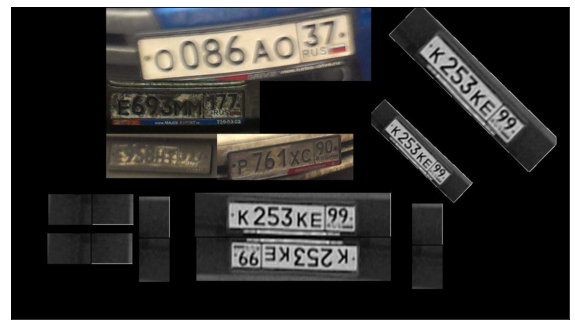

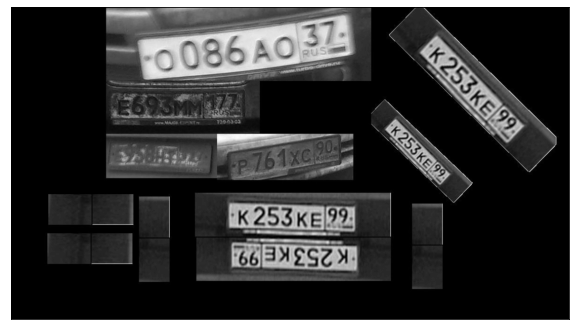

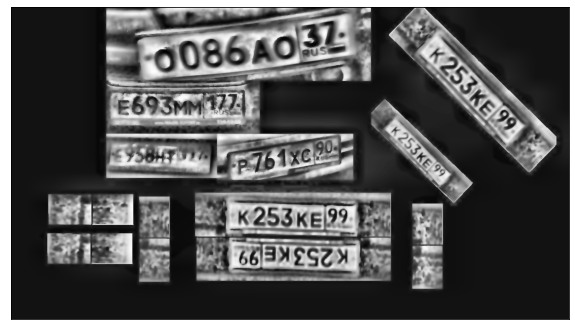

In [3]:
img = cv2.imread('img/car_plates.jpg')
show_image(img, False)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_orig = gray.copy()
show_image(gray)
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(20,20))
gray = clahe.apply(gray)
gray = cv2.bilateralFilter(clahe.apply(gray),9,75,75)
show_image(gray)

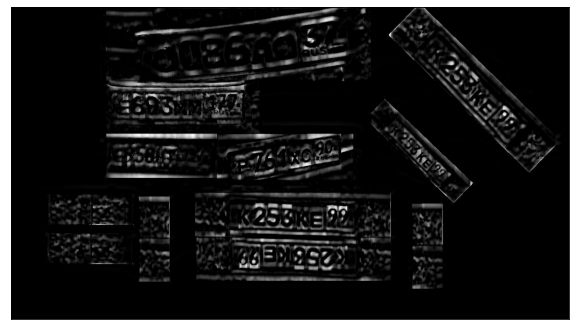

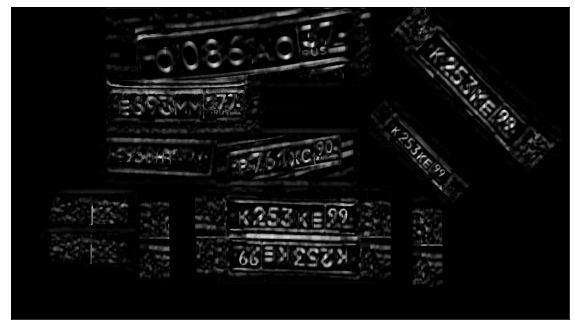

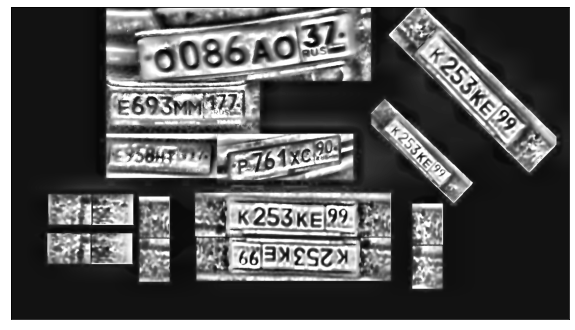

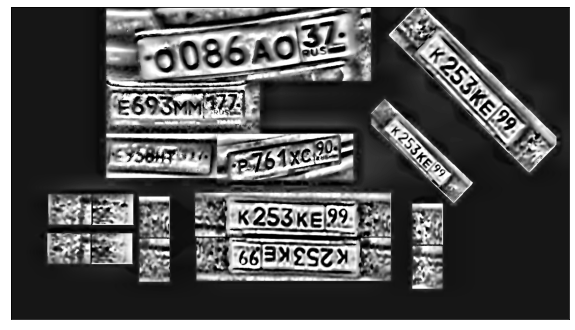

In [4]:
imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 13)))
show_image(imgTopHat)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 13)))
show_image(imgBlackHat)
imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
show_image(imgGrayscalePlusTopHat)
new_gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)
show_image(new_gray)

In [5]:
grayT = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(20,20))
gray_plates = clahe.apply(grayT)
gray_plates = cv2.bilateralFilter(gray_plates,9,50,50)
ret, gray_plates = cv2.threshold(gray_plates,0,255,cv2.THRESH_OTSU)
gray_plates = cv2.morphologyEx(gray_plates, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)))
gray_plates = cv2.morphologyEx(gray_plates, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)))
contours, hierarchy = cv2.findContours(gray_plates, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

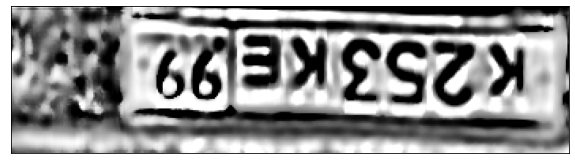

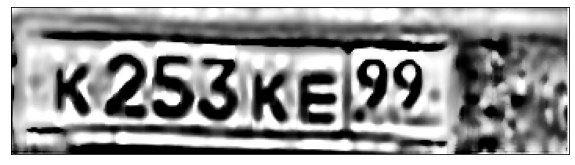

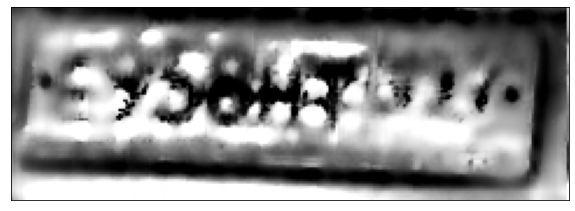

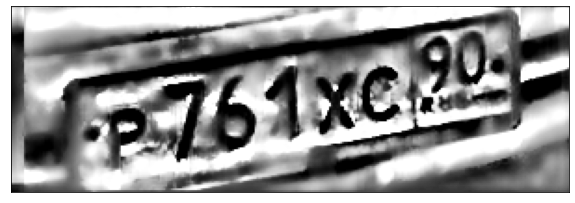

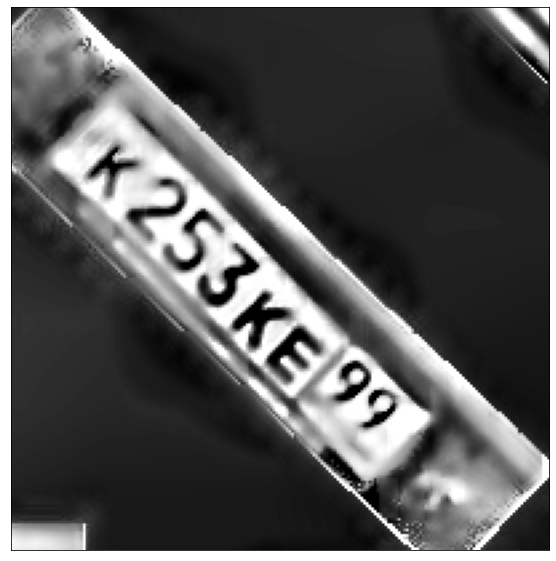

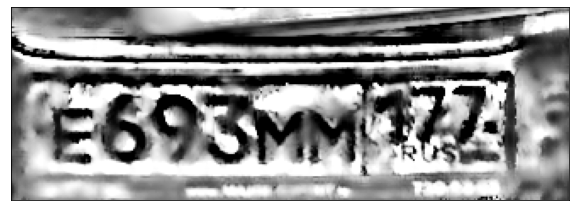

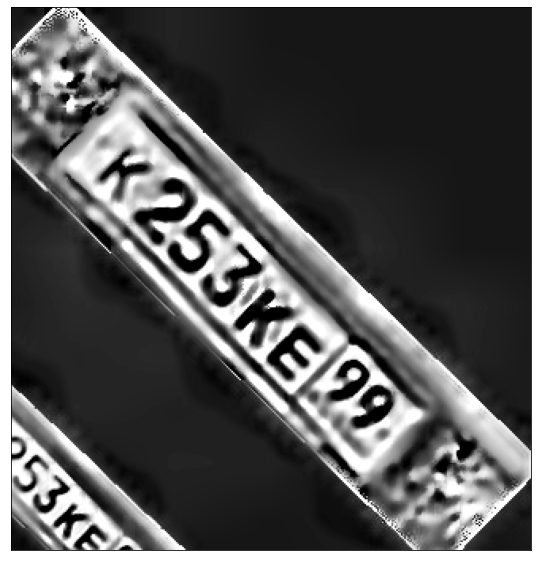

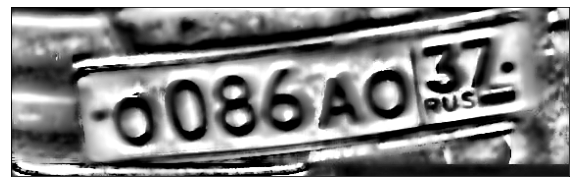

Найдено номеров:  8


In [6]:
gray_edited = []      # серое после улучшения качества
gray_not_edited = []  # серое
color_not_edited = [] # цветное
for c in contours:
    area = cv2.contourArea(c)
    if (area > 10000):
        x, y, w, h = cv2.boundingRect(c)
        ttt = gray_orig[y:y + h, x:x + w]
        gray_not_edited.append(ttt)
        
        ttt = new_gray[y:y + h, x:x + w]
        gray_edited.append(ttt)
        show_image(ttt)
        
        ttt = img[y:y + h, x:x + w]
        color_not_edited.append(ttt)
print('Найдено номеров: ', len(gray_edited))